In [2]:
import torch, pickle, time, os, random, dill
import numpy as np
import os.path as osp
import matplotlib.pyplot as plt
# accelerate huggingface to GPU
if torch.cuda.is_available():
    from accelerate import Accelerator
    accelerator = Accelerator()
    device = accelerator.device
from pysr import pysr, best, PySRRegressor
from tqdm import tqdm
from torch.utils.data import DataLoader, Dataset

torch.manual_seed(42)
random.seed(42)


print('Loading data')

xs = pickle.load(open(osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/standard_raw_final_6t/xs.pkl"), 'rb'))
ys = pickle.load(open(osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/standard_raw_final_6t/ys.pkl"), 'rb'))
n_targ = len(ys[0])
print('Loaded data')


Loading data
Loaded data


In [3]:
N = 2**5
idx = random.choices(np.arange(len(ys)), k=N)
print(N)
x_pysr = xs[:N]
y_pysr = ys[:N,0]
model = PySRRegressor(
    procs=4,
    niterations=2,
    populations=20,
    useFrequency=True,
    multithreading=True, 
    binary_operators=["plus", "sub", "mult", "div", "pow"],
    unary_operators = ['log10_abs', 'sqrt_abs', 'exp', 'log'], ##still need a general power law
    constraints={'pow': (-1, 1)}, ##=just added 170422, set to {-1, 0} maybe
    batching=1, 
    batchSize=512,
    maxsize=20, update=False #had max-size of 10 for the last good one
)

32


/home/cj1223/.conda/envs/juptorch_julia/lib/python3.9/site-packages/pysr/sr.py:623: UserWarning: useFrequency has been renamed to use_frequency in PySRRegressor. Please use that instead.
  warnings.warn(
/home/cj1223/.conda/envs/juptorch_julia/lib/python3.9/site-packages/pysr/sr.py:623: UserWarning: batchSize has been renamed to batch_size in PySRRegressor. Please use that instead.
  warnings.warn(


In [4]:
##takes about 5 minutes to start
model.fit(X=x_pysr, y=y_pysr,)

  Activating environment at `~/.julia/environments/pysr-0.8.3/Project.toml`
    Updating registry at `~/.julia/registries/General`
┌ Warning: could not download https://pkg.julialang.org/registries
└ @ Pkg.Types /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.6/Pkg/src/Types.jl:980
   Resolving package versions...
  No Changes to `~/.julia/environments/pysr-0.8.3/Project.toml`
  No Changes to `~/.julia/environments/pysr-0.8.3/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/pysr-0.8.3/Project.toml`
  No Changes to `~/.julia/environments/pysr-0.8.3/Manifest.toml`


Started!

Cycles per second: 7.120e+03
Head worker occupation: 14.0%
Progress: 20 / 40 total iterations (50.000%)
Hall of Fame:
-----------------------------------------
Complexity  loss       Score     Equation
1           1.477e+00  -1.000e-10  -0.3766852
2           6.444e-01  8.293e-01  log10_abs(x0)
3           4.027e-01  4.701e-01  (x16 + -1.0150446)
5           2.652e-01  2.089e-01  ((x1 - 1.9512656) / 1.9512656)
6           1.878e-01  3.450e-01  ((sqrt_abs(0.30343592) * x16) + -1.0150446)
7           9.685e-02  6.622e-01  (((x16 * 0.89082223) + -1.2260512) * 0.7793256)
8           8.506e-02  1.299e-01  log10_abs((pow(3.2520044, x16) + -0.37706223) * 0.24455266)
11          6.031e-02  1.146e-01  (log10_abs(exp(log_abs(exp(x16) + -0.2887092) / 0.7284693)) - 0.6470968)
14          5.678e-02  2.007e-02  log_abs(log10_abs(exp(sqrt_abs(exp(x16 + 1.1814615)) + log_abs(log_abs(x7 + -0.65331787)))))
19          5.185e-02  1.818e-02  log_abs(log10_abs(exp(sqrt_abs(exp(x16 + sqrt_abs(sqrt

PySRRegressor.equations = [
	    pick     score                                           equation  \
	0         0.000000                                         -0.3766852   
	1   >>>>  0.829344                                      log10_abs(x0)   
	2         0.470127                                 (x16 + -1.0150446)   
	3         0.360570                    ((x13 - 1.5196797) / 1.5196797)   
	4         0.096590          ((x13 - sqrt_abs(1.9512656)) / 1.5196797)   
	5         0.607228    (((x16 * 0.89082223) + -1.2260512) * 0.7793256)   
	6         0.129867  log10_abs((pow(3.2520044, x16) + -0.37706223) ...   
	7         0.207170  log_abs(log10_abs(exp(sqrt_abs(exp(x16 + 1.201...   
	8         0.003248  log_abs(log10_abs(exp(sqrt_abs(exp(x16 + sqrt_...   
	9         0.054655  log_abs(log10_abs(exp(sqrt_abs(exp(x16 + sqrt_...   
	10        0.023152  log_abs(log10_abs(exp(sqrt_abs(exp(x16 + sqrt_...   
	
	        loss  complexity  
	0   1.476775           1  
	1   0.644370           2 

In [8]:
eq=model.equations.iloc[10]

In [26]:
eqs = []
for e in model.equations['lambda_format']:
    print(e)
    eqs.append(e)

PySRFunction(X=>-0.376685200000000)
PySRFunction(X=>log(Abs(x0))/log(10))
PySRFunction(X=>x16 - 1.0150446)
PySRFunction(X=>0.6580334000645*x13 - 1.0)
PySRFunction(X=>0.6580334000645*x13 - 0.919191779929237)
PySRFunction(X=>0.694240568888088*x16 - 0.95549308707072)
PySRFunction(X=>log(Abs(0.24455266*3.2520044**x16 - 0.0922115713320318))/log(10))
PySRFunction(X=>log(Abs(log(0.432963738192654*exp(1.82328952323339*exp(re(x16)/2))))/log(10)))
PySRFunction(X=>log(Abs(log(0.535987038557194*exp(exp(re(x16)/2 + Abs(x16 + 0.822465956742284*sqrt(Abs(x5)))**(1/8)/2))))/log(10)))
PySRFunction(X=>log(Abs(log(0.535987038557194*exp(exp(re(x16)/2 + Abs(x16 + Abs(x16 + 0.6599597)**(1/4))**(1/8)/2))))/log(10)))
PySRFunction(X=>log(Abs(log(0.535987038557194*exp(exp(re(x16)/2 + Abs(x16 + x27*log(Abs(x1)) + 0.6599597)**(1/8)/2))))/log(10)))


In [28]:
# dill.dumps(eqs)

In [19]:
# eq = g1_equations.sort_values(by='score', ascending=False).iloc[0]
a=eq['lambda_format'](xs)
a

array([-0.84799492, -0.07346047, -1.13858533, ..., -1.97410345,
       -2.35098338, -1.79761982])

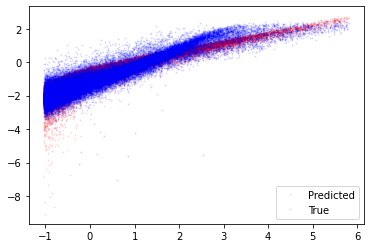

In [21]:
plt.plot(xs[:,1], eq.lambda_format(xs), 'ro', alpha=0.1, markersize=1, label='Predicted')
plt.plot(xs[:,1], ys[:,0], 'bo', alpha=0.1, markersize=1, label='True')
plt.legend()

0.23471075


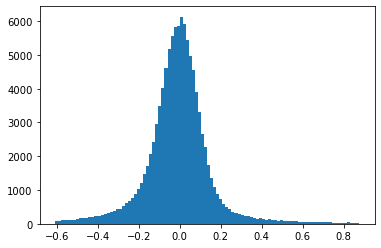

In [40]:
res = eq.lambda_format(xs)-ys[:,0]
plt.hist(res, bins=100, range=np.percentile(res, [1,99]));
print(np.std(res))

In [41]:
eq = g1_equations.sort_values(by='MSE', ascending=True).iloc[0]
a=eq['lambda_format'](xs[0])
eq

Complexity                                                      7
MSE                                                       0.04024
score                                                    0.124803
Equation               (-1.1568253 + (x16 / pow(1.0463603, x33)))
sympy_format                      -1.1568253 + x16/1.0463603**x33
lambda_format    PySRFunction(X=>-1.1568253 + x16/1.0463603**x33)
Name: 4, dtype: object

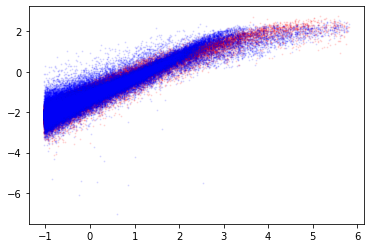

In [42]:
plt.plot(xs[:,1], eq.lambda_format(xs),'ro', alpha=0.1, markersize=1, label='Predicted')
plt.plot(xs[:,1], ys[:,0],'bo', alpha=0.1, markersize=1, label='True')

0.19407539


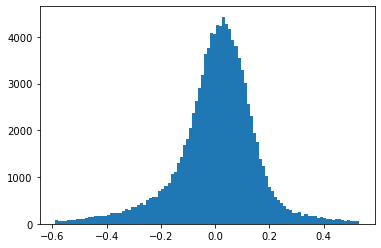

In [43]:
res = eq.lambda_format(xs)-ys[:,0]
plt.hist(res, bins=100, range=np.percentile(res, [1,99]));
print(np.std(res))